In [1]:
import comet_ml
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

comet_api = comet_ml.api.API()

In [5]:
class ExperminetInfo:
    def __init__(self, comet_api, exp_id):
        self.exp = comet_api.get(exp_id)
        self.__metrics = None

    @property
    def metrics(self):
        if self.__metrics is None:
            self.__metrics = self.exp.get_metrics()
        return self.__metrics

    @property
    def metric_names(self):
        return np.unique([m['metricName'] for m in self.metrics])

    def get_metrics_df(self, metric_names=None):
        if metric_names is None:
            metric_names = self.metric_names

        values_dict = defaultdict(lambda: {'d': [], 'i': []})
        for metric_name in metric_names:
            metrics = self.exp.get_metrics(metric_name)
            for m in metrics:
                if m['step'] is not None:
                    v = values_dict[m['metricName']]
                    v['d'].append(float(m['metricValue']))
                    v['i'].append(m['step'])
        return pd.DataFrame({k: pd.Series(v['d'], v['i']) for k, v in values_dict.items()})

In [6]:
expinf = ExperminetInfo(comet_api, 'federated-learning/server-side-opt-long/6ff84da994984903a518738f674b6046')

In [7]:
train_loss_metric_names = [m for m in expinf.metric_names if m.endswith('_train_loss')]

In [8]:
df = expinf.get_metrics_df(train_loss_metric_names)

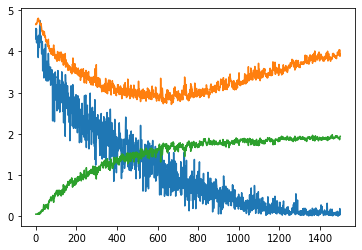

In [18]:
plt.plot(df.min(axis=1))
plt.plot(expinf.get_metrics_df(['test_loss']))
plt.plot(expinf.get_metrics_df(['test_acc'])/20)

In [19]:
df.min(axis=1)

0       4.417422
1       4.557984
2       4.293173
3       4.544556
4       4.213437
          ...   
1495    0.033473
1496    0.027587
1497    0.185790
1498    0.166885
1499    0.044466
Length: 1500, dtype: float64